In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [26]:
NUM_WORDS = 1000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [40]:
train_data.shape, test_data.shape  
# 25000개의 각각의 row에는 각 데이터가 포함하고 있는 단어가 나열되어 있음
# ex) [1, 2, 3, 5] : 1, 2, 3, 5 index의 단어가 포함된 문장
# 각 row의 문장의 길이가 다르기 때문에 (25000,)로 표현됨

((25000,), (25000,))

In [41]:
# [1, 3] => [0, 1, 0, 1, 0]  : dimension = 5
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indicies in enumerate(sequences):
        results[i, word_indicies] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results

In [42]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [43]:
train_data.shape, test_data.shape

((25000, 1000), (25000, 1000))

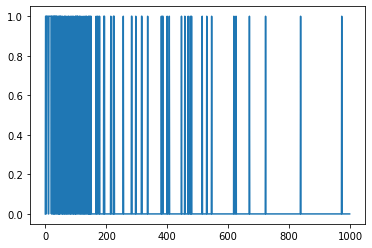

In [45]:
plt.plot(train_data[0])  # multi-hot vector의 예
# 단어 인덱스는 빈도 순으로 정렬되어 있습니다. 그래프에서 볼 수 있듯이 인덱스 0에 가까울수록 1이 많이 등장합니다

## Baseline Model

In [46]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [47]:
baseline_history = baseline_model.fit(train_data, train_labels,
                                      batch_size=512, epochs=20,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5513 - accuracy: 0.7159 - binary_crossentropy: 0.5513 - val_loss: 0.4049 - val_accuracy: 0.8281 - val_binary_crossentropy: 0.4049
Epoch 2/20
49/49 - 0s - loss: 0.3516 - accuracy: 0.8502 - binary_crossentropy: 0.3516 - val_loss: 0.3439 - val_accuracy: 0.8540 - val_binary_crossentropy: 0.3439
Epoch 3/20
49/49 - 0s - loss: 0.3153 - accuracy: 0.8702 - binary_crossentropy: 0.3153 - val_loss: 0.3332 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3332
Epoch 4/20
49/49 - 0s - loss: 0.3033 - accuracy: 0.8754 - binary_crossentropy: 0.3033 - val_loss: 0.3290 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3290
Epoch 5/20
49/49 - 0s - loss: 0.2988 - accuracy: 0.8765 - binary_crossentropy: 0.2988 - val_loss: 0.3296 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3296
Epoch 6/20
49/49 - 0s - loss: 0.2922 - accuracy: 0.8791 - binary_crossentropy: 0.2922 - val_loss: 0.3316 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3316
Epoch 7/20
49/49 - 0s - loss

## Smaller Model

In [50]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [51]:
smaller_history = smaller_model.fit(train_data, train_labels,
                                    batch_size=512, epochs=20,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6571 - accuracy: 0.5896 - binary_crossentropy: 0.6571 - val_loss: 0.6193 - val_accuracy: 0.6752 - val_binary_crossentropy: 0.6193
Epoch 2/20
49/49 - 0s - loss: 0.5844 - accuracy: 0.7206 - binary_crossentropy: 0.5844 - val_loss: 0.5577 - val_accuracy: 0.7691 - val_binary_crossentropy: 0.5577
Epoch 3/20
49/49 - 0s - loss: 0.5316 - accuracy: 0.7972 - binary_crossentropy: 0.5316 - val_loss: 0.5160 - val_accuracy: 0.8155 - val_binary_crossentropy: 0.5160
Epoch 4/20
49/49 - 0s - loss: 0.4938 - accuracy: 0.8332 - binary_crossentropy: 0.4938 - val_loss: 0.4849 - val_accuracy: 0.8400 - val_binary_crossentropy: 0.4849
Epoch 5/20
49/49 - 0s - loss: 0.4630 - accuracy: 0.8530 - binary_crossentropy: 0.4630 - val_loss: 0.4591 - val_accuracy: 0.8445 - val_binary_crossentropy: 0.4591
Epoch 6/20
49/49 - 0s - loss: 0.4353 - accuracy: 0.8634 - binary_crossentropy: 0.4353 - val_loss: 0.4332 - val_accuracy: 0.8540 - val_binary_crossentropy: 0.4332
Epoch 7/20
49/49 - 0s - loss

## Bigger Model

In [52]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [53]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  batch_size=512, epochs=20,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4397 - accuracy: 0.7920 - binary_crossentropy: 0.4397 - val_loss: 0.3330 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3330
Epoch 2/20
49/49 - 3s - loss: 0.2943 - accuracy: 0.8784 - binary_crossentropy: 0.2943 - val_loss: 0.3214 - val_accuracy: 0.8614 - val_binary_crossentropy: 0.3214
Epoch 3/20
49/49 - 3s - loss: 0.2245 - accuracy: 0.9115 - binary_crossentropy: 0.2245 - val_loss: 0.3411 - val_accuracy: 0.8566 - val_binary_crossentropy: 0.3411
Epoch 4/20
49/49 - 3s - loss: 0.1031 - accuracy: 0.9690 - binary_crossentropy: 0.1031 - val_loss: 0.4313 - val_accuracy: 0.8450 - val_binary_crossentropy: 0.4313
Epoch 5/20
49/49 - 3s - loss: 0.0220 - accuracy: 0.9965 - binary_crossentropy: 0.0220 - val_loss: 0.5373 - val_accuracy: 0.8502 - val_binary_crossentropy: 0.5373
Epoch 6/20
49/49 - 3s - loss: 0.0040 - accuracy: 0.9999 - binary_crossentropy: 0.0040 - val_loss: 0.5994 - val_accuracy: 0.8534 - val_binary_crossentropy: 0.5994
Epoch 7/20
49/49 - 3s - loss

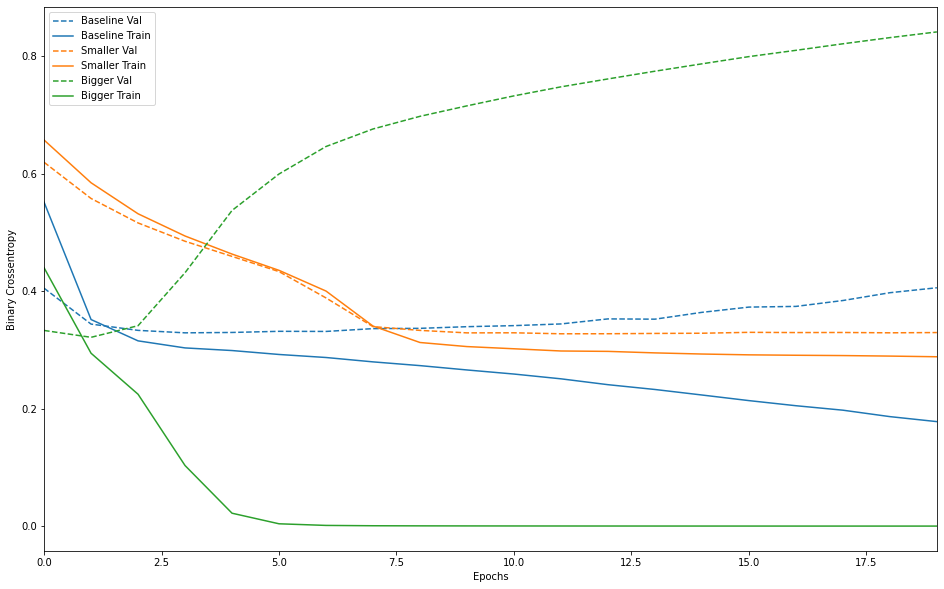

In [61]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())  # title() : 단어 앞글자 대문자로
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])
        

## L2 Regularizer

In [64]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(test_data, test_labels,
                                epochs=20, batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6086 - accuracy: 0.7119 - binary_crossentropy: 0.5641 - val_loss: 0.4420 - val_accuracy: 0.8345 - val_binary_crossentropy: 0.3992
Epoch 2/20
49/49 - 0s - loss: 0.3942 - accuracy: 0.8528 - binary_crossentropy: 0.3517 - val_loss: 0.3537 - val_accuracy: 0.8714 - val_binary_crossentropy: 0.3120
Epoch 3/20
49/49 - 0s - loss: 0.3515 - accuracy: 0.8712 - binary_crossentropy: 0.3105 - val_loss: 0.3390 - val_accuracy: 0.8741 - val_binary_crossentropy: 0.2990
Epoch 4/20
49/49 - 0s - loss: 0.3391 - accuracy: 0.8727 - binary_crossentropy: 0.3000 - val_loss: 0.3253 - val_accuracy: 0.8795 - val_binary_crossentropy: 0.2871
Epoch 5/20
49/49 - 0s - loss: 0.3339 - accuracy: 0.8748 - binary_crossentropy: 0.2964 - val_loss: 0.3237 - val_accuracy: 0.8798 - val_binary_crossentropy: 0.2871
Epoch 6/20
49/49 - 0s - loss: 0.3290 - accuracy: 0.8766 - binary_crossentropy: 0.2930 - val_loss: 0.3194 - val_accuracy: 0.8810 - val_binary_crossentropy: 0.2841
Epoch 7/20
49/49 - 0s - loss

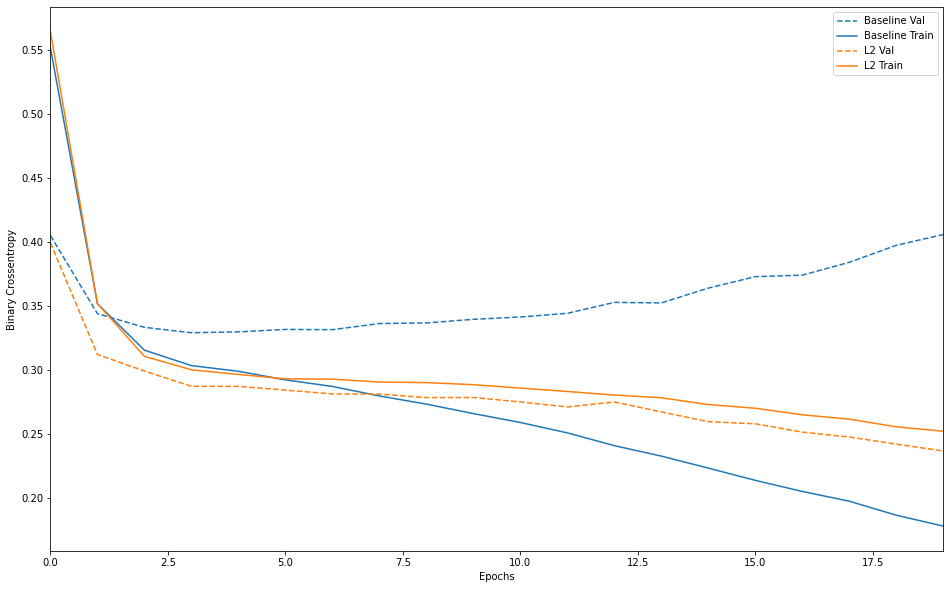

In [67]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## Drop Out

In [68]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])
dpt_model_history = dpt_model.fit(test_data, test_labels,
                                epochs=20, batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6798 - accuracy: 0.5649 - binary_crossentropy: 0.6798 - val_loss: 0.6163 - val_accuracy: 0.7532 - val_binary_crossentropy: 0.6163
Epoch 2/20
49/49 - 0s - loss: 0.5792 - accuracy: 0.6913 - binary_crossentropy: 0.5792 - val_loss: 0.4436 - val_accuracy: 0.8375 - val_binary_crossentropy: 0.4436
Epoch 3/20
49/49 - 0s - loss: 0.4827 - accuracy: 0.7746 - binary_crossentropy: 0.4827 - val_loss: 0.3677 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3677
Epoch 4/20
49/49 - 0s - loss: 0.4294 - accuracy: 0.8145 - binary_crossentropy: 0.4294 - val_loss: 0.3224 - val_accuracy: 0.8720 - val_binary_crossentropy: 0.3224
Epoch 5/20
49/49 - 0s - loss: 0.3956 - accuracy: 0.8331 - binary_crossentropy: 0.3956 - val_loss: 0.3074 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.3074
Epoch 6/20
49/49 - 0s - loss: 0.3800 - accuracy: 0.8412 - binary_crossentropy: 0.3800 - val_loss: 0.2905 - val_accuracy: 0.8838 - val_binary_crossentropy: 0.2905
Epoch 7/20
49/49 - 0s - loss

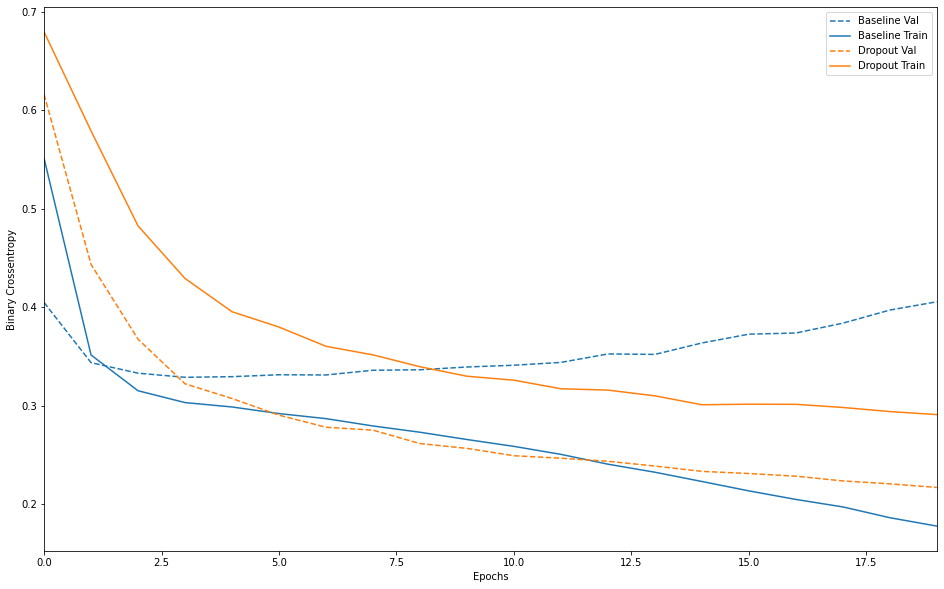

In [69]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])